# 项目：墨尔本住房数据集

## 简介

此数据集关于墨尔本的住房，包括地址、房地产类型、所处郊区、出售方法、房间数量、价格、房地产经纪人、销售日期和与CBD的距离等信息。
变量含义：
- `Suburb`：住宅所在郊区名称
- `Address`：地址
- `Rooms`：房间数量
- `Type`：住宅类型，br-卧室；h-房子、别墅等；u-单元楼；t-联排别墅；dev site-开发站；o res-其他住宅
- `Price`：住宅价格
- `Method`：出售的方法，S-已出售的房产；SP——事先出售的房产；PI-录入的房产；PN——事先出售，未披露；SN-出售未披露；NB-无人竞价；VB——供应商竞价；W——拍卖前撤回；SA——拍卖后出售；SS-未披露拍卖价格后售出；N/A-价格或最高出价不可用
- `SellerG`：房地产经纪人
- `Date`：住宅卖出日期
- `Distance`：距离CBD的距离
- `Postcode`：住宅邮编
- `Bedroom2`：卧室的数量
- `Bathroom`：浴室的数量
- `Car`：车位数量
- `Landsize`：土地规模
- `BuildingArea`：建筑尺寸
- `YearBuilt`：建造年份
- `CouncilArea`：该地区的管理委员会
- `Lattitude`：纬度地区
- `Longtitude`：经度地区
- `Regionname`：大体所在地区（西部、西北部、北部、东北部等）
- `Propertycount`：郊区现有的房地产数量。

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./melb_housing.csv")

In [3]:
original_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## **评估和清理数据**

In [4]:
cleaned_data = original_data.copy()

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### 1 类型转换和缺失值检查

In [6]:
# `Date`转换为datatime类型
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], errors='coerce')

In [7]:
# `Type`, `Method`, `Regionname`是类别型数据，可以由object转换为category。
cleaned_data['Type'] = cleaned_data['Type'].astype('category')
cleaned_data['Method'] = cleaned_data['Method'].astype('category')
cleaned_data['Regionname'] = cleaned_data['Regionname'].astype('category')

In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  category      
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  category      
 6   SellerG        13580 non-null  object        
 7   Date           5138 non-null   datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

`car`, `BuildingArea`, `YearBuilt `, `CouncilArea`有缺失值。（但此次分析会分析到房价和房屋面积`BuildingArea`的关系，其他的均没有影响）

In [9]:
# 缺失值检查
cleaned_data.duplicated().sum()

8

In [10]:
# 删除重复行
cleaned_data.drop_duplicates(inplace=True)

## **数据可视化分析**

In [11]:
# 设置绘图风格
sns.set(style="whitegrid")

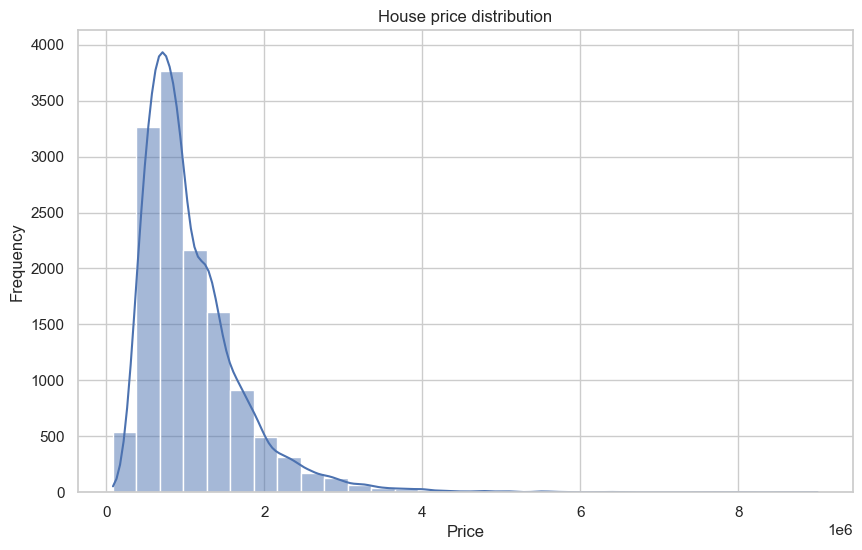

In [12]:
# 直方图：展示房价的分布
plt.figure(figsize=(10,6))
sns.histplot(cleaned_data['Price'], bins=30, kde=True)
plt.title('House price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

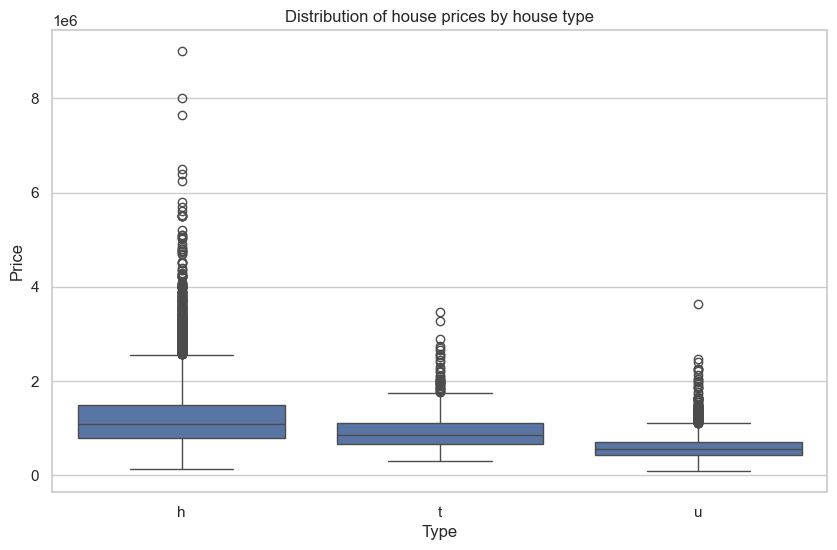

In [13]:
# 箱线图：展示不同房屋类型的房价分布
plt.figure(figsize=(10,6))
sns.boxplot(x='Type', y='Price', data=cleaned_data)
plt.title('Distribution of house prices by house type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

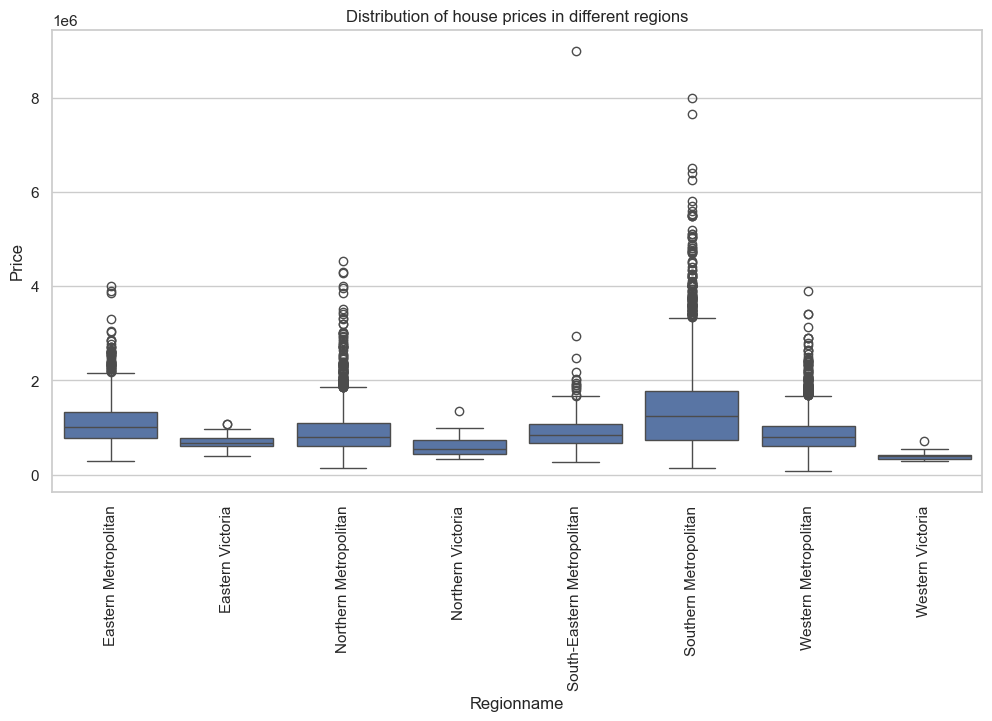

In [14]:
# 箱线图：按区域展示房价分布
plt.figure(figsize=(12,6))
sns.boxplot(x='Regionname', y='Price', data=cleaned_data)
plt.title('Distribution of house prices in different regions')
plt.xticks(rotation=90)
plt.xlabel('Regionname')
plt.ylabel('Price')
plt.show()

In [15]:
cleaned_data["BuildingArea"].isna().sum()

6447

In [16]:
dropna_BuildingArea_data = cleaned_data.dropna(subset=['BuildingArea'])

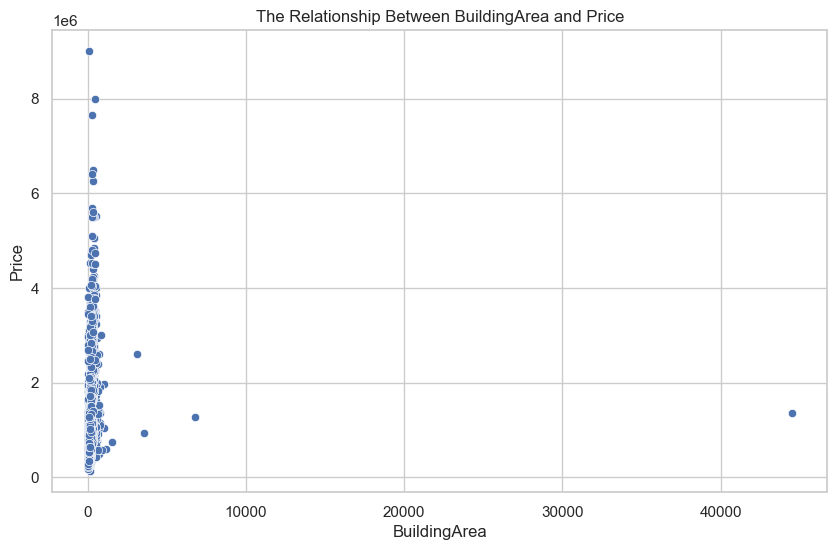

In [17]:
# 散点图：展示房价与房屋面积的关系
plt.figure(figsize=(10,6))
sns.scatterplot(x='BuildingArea', y='Price', data=dropna_BuildingArea_data)
plt.title('The Relationship Between BuildingArea and Price')
plt.xlabel('BuildingArea')
plt.ylabel('Price')
plt.show()

## 房价预测模型

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 选择特征和目标变量
features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[features]
y = data['Price']

# 填充缺失值（可以选择填充中位数或均值）
X = X.fillna(X.median())

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集房价
y_pred = model.predict(X_test)

# 评估模型性能（均方误差）
mse = mean_squared_error(y_test, y_pred)
print(f'均方误差: {mse}')

# 查看模型的系数
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)
